## Module 

In [27]:
import time
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns; sns.set()

## Importation Nom

In [28]:
f = open("Names_colonne.txt", "r")
lignes = f.readlines()

nom = []
for i in lignes:
    nom.append(i[11:-1])
    

nom

['state numeric',
 'county numeric',
 'community numeric',
 'communityname string',
 'fold numeric',
 'population numeric',
 'householdsize numeric',
 'racepctblack numeric',
 'racePctWhite numeric',
 'racePctAsian numeric',
 'racePctHisp numeric',
 'agePct12t21 numeric',
 'agePct12t29 numeric',
 'agePct16t24 numeric',
 'agePct65up numeric',
 'numbUrban numeric',
 'pctUrban numeric',
 'medIncome numeric',
 'pctWWage numeric',
 'pctWFarmSelf numeric',
 'pctWInvInc numeric',
 'pctWSocSec numeric',
 'pctWPubAsst numeric',
 'pctWRetire numeric',
 'medFamInc numeric',
 'perCapInc numeric',
 'whitePerCap numeric',
 'blackPerCap numeric',
 'indianPerCap numeric',
 'AsianPerCap numeric',
 'OtherPerCap numeric',
 'HispPerCap numeric',
 'NumUnderPov numeric',
 'PctPopUnderPov numeric',
 'PctLess9thGrade numeric',
 'PctNotHSGrad numeric',
 'PctBSorMore numeric',
 'PctUnemployed numeric',
 'PctEmploy numeric',
 'PctEmplManu numeric',
 'PctEmplProfServ numeric',
 'PctOccupManu numeric',
 'PctOccupM

## Importation fichier

In [29]:
import pandas as pd
df = pd.read_csv("Data_set.csv",sep = ';' , header=None)
df.columns = nom
df

,state numeric,county numeric,community numeric,communityname string,fold numeric,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## Division en catégorie 

In [30]:
df_categorie = pd.read_csv("Classification.csv",sep = ';', encoding="ISO-8859-1")
df_categorie


,Category,tes,test,Attribut
0,Class. data,state,@attribute state numeric,state numeric
1,Class. data,i,@attribute county numeric,county numeric
2,Class. data,community,@attribute community numeric,community numeric
3,Class. data,communityname,@attribute communityname string,communityname string
4,Stat,fold,@attribute fold numeric,fold numeric
...,...,...,...,...
122,Police data,PolicOperBudg,@attribute PolicOperBudg numeric,PolicOperBudg numeric
123,Police data,LemasPctPolicOnPatr,@attribute LemasPctPolicOnPatr numeric,LemasPctPolicOnPatr numeric
124,Police data,LemasGangUnitDeploy,@attribute LemasGangUnitDeploy numeric,LemasGangUnitDeploy numeric
125,Police data,LemasPctOfficDrugUn,@attribute LemasPctOfficDrugUn numeric,LemasPctOfficDrugUn numeric


In [31]:
import math
def classi(df, df_all) :
    resultat = []
    Unique = set(df["Category"])
    unique = list(Unique)
    for i, test  in zip(range(len(unique)), unique): 
        resultat.append(pd.DataFrame())
        test = df_categorie[df_categorie["Category"] == unique[i]]
        compteur=0 
        for attribut in test["Attribut"]:
            for j in df_all.columns :
                if attribut == j:
                    resultat[i] = pd.concat([resultat[i],df_all[j] ],axis=1)
                    compteur+=1
        resultat[i] = pd.concat([resultat[i],df_all["ViolentCrimesPerPop numeric"] ],axis=1)
   
    return resultat,unique
    
    
    

    
category, nom_category = classi(df_categorie,df)
nom_category
#print(category[0])



['Class. data',
 'Stat',
 'Rev. dist.',
 'Poverty metrics',
 'Marital metrics',
 'Wage Cat.',
 'Size of menages',
 'Police data',
 'Type de menage',
 'Race',
 'Immigration metrics',
 'Age ']

##  Suppression valeur manquante  

In [32]:
#Point d'interrogation dans les données policière
index = nom_category.index('Police data')
Police_data =  category[index] 
Police_data= Police_data[Police_data["LemasPctPolicOnPatr numeric"] != "?"]
Police_data = Police_data[Police_data["LemasGangUnitDeploy numeric"] != "?"]
category[index]=  Police_data
print(nom_category)

['Class. data', 'Stat', 'Rev. dist.', 'Poverty metrics', 'Marital metrics', 'Wage Cat.', 'Size of menages', 'Police data', 'Type de menage', 'Race', 'Immigration metrics', 'Age ']


In [33]:
#suppression community numeri et country numeric 
index2 = nom_category.index('Class. data')
class_data =  category[index2] 

#del class_data["community numeric"]
#del class_data["county numeric"]

#remplacer ville par des numeros on ne veut que des colonnes en string

#creation index
villes = pd.DataFrame(class_data["communityname string"].values)
index = pd.DataFrame([x for x in range(1,1995)])
tableau_index = pd.concat([index, villes], axis=1)
tableau_index.columns = ["index","villes"]

#suppression ville, remplacement par index
del class_data["communityname string"]
class_data = pd.concat([index,class_data], axis=1)
category[index2] = class_data


nom_category

category_fin = category.copy()

## Correlation par catégorie 



In [34]:
category_corr = []
for name, category in zip(nom_category,category):
    cate = category.corr()
    name = cate["ViolentCrimesPerPop numeric"]
    name = pd.DataFrame(name)
    #nom_category["index"] = nom_category.index
    name = name.reset_index()
    name.columns = ["category", "corr_violentCrimesPerPop" ]
    category_corr.append(name)



In [35]:

category_corr

[                      category  corr_violentCrimesPerPop
 0                            0                 -0.034614
 1                state numeric                 -0.211398
 2           population numeric                  0.367157
 3        householdsize numeric                 -0.034923
 4            numbUrban numeric                  0.362897
 5             pctUrban numeric                  0.082025
 6  ViolentCrimesPerPop numeric                  1.000000,
                       category  corr_violentCrimesPerPop
 0                 fold numeric                 -0.032577
 1  ViolentCrimesPerPop numeric                  1.000000,
                       category  corr_violentCrimesPerPop
 0            perCapInc numeric                 -0.352085
 1          whitePerCap numeric                 -0.209272
 2          blackPerCap numeric                 -0.275391
 3         indianPerCap numeric                 -0.090854
 4          AsianPerCap numeric                 -0.155592
 5          

## Affichage donnée sur les categories

In [36]:
for corre, name in zip(category_corr,nom_category) : 
    print(name)
    print(corre["corr_violentCrimesPerPop"].describe())
    

Class. data
count    7.000000
mean     0.218735
std      0.405261
min     -0.211398
25%     -0.034768
50%      0.082025
75%      0.365027
max      1.000000
Name: corr_violentCrimesPerPop, dtype: float64
Stat
count    2.000000
mean     0.483712
std      0.730142
min     -0.032577
25%      0.225568
50%      0.483712
75%      0.741856
max      1.000000
Name: corr_violentCrimesPerPop, dtype: float64
Rev. dist.
count    7.000000
mean    -0.046821
std      0.469134
min     -0.352085
25%     -0.259972
50%     -0.209272
75%     -0.123223
max      1.000000
Name: corr_violentCrimesPerPop, dtype: float64
Poverty metrics
count    16.000000
mean      0.172794
std       0.386480
min      -0.339109
25%      -0.113578
50%       0.179714
75%       0.456528
max       1.000000
Name: corr_violentCrimesPerPop, dtype: float64
Marital metrics
count    14.000000
mean      0.095901
std       0.594214
min      -0.738424
25%      -0.533826
50%       0.222617
75%       0.545935
max       1.000000
Name: corr_viole

## Affichage categorie correlé

In [37]:
final = []
catégory_nom_corrélé = []
donnee = []
cor_positiv = []
cor_negati= []
catégory_corrélé= []
for corre, nom in zip(category_corr, nom_category) : 
    for correlation, i in zip(corre["corr_violentCrimesPerPop"], range(len(corre["corr_violentCrimesPerPop"]))): 
        if -0.5< correlation <0.5 or correlation == 1.0:
            corre = corre.drop(i)
        elif correlation> 0.5:
            cor_positiv.append(corre["category"][i])
            cor_positiv.append(correlation)
            
        elif correlation< -0.5:
            cor_negati.append(corre["category"][i])
            cor_negati.append(correlation)
            
    if corre.empty :
        catégory_nom_corrélé.append(nom)
        
    else : 
        final.append(nom)
        catégory_corrélé.append(nom)
        final.append(corre)
        donnee.append(corre)
        
        
#print("les categories non corréles sont" ,catégory_nom_corrélé)
#print("les categories corréles sont",catégory_corrélé)
#print(final)
#cor_negati = pd.DataFrame(cor_negati)
#final
#print(category_corr)

## Corrélation sur toute les variables 

## Suppression valeur manquante 

In [43]:
#Retirer valeur manquante police 
df3 = df[df["LemasPctPolicOnPatr numeric"] != "?"]
df3 = df[df["LemasGangUnitDeploy numeric"] != "?"]

#retirer county numeric	community numeric
del df3["community numeric"]
del df3["county numeric"]

#villes = np.unique(df3["communityname string"].values) #ville qui y sont deux fois 

villes = pd.DataFrame(df3["communityname string"].values)
len(villes)
index = pd.DataFrame([x for x in range(1,320)])
tableau_index = pd.concat((index, villes), axis=1)


del df3["communityname string"]
df3 = df3.reset_index()
df3 = pd.concat([index,df3], axis=1)

#for test,name in zip(df3.corr()["ViolentCrimesPerPop numeric"],df3.corr().index) :
    #print(test, name)

df_pca = df3
df_pca["ViolentCrimesPerPop numeric"].describe()

df_ia = df3.copy()
df_ia

,0,index,state numeric,fold numeric,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,1,0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,2,16,36,1,0.15,0.31,0.40,0.63,0.14,0.06,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
2,3,20,6,1,0.25,0.54,0.05,0.71,0.48,0.30,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
3,4,21,12,1,1.00,0.42,0.47,0.59,0.12,0.05,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
4,5,23,19,1,0.11,0.43,0.04,0.89,0.09,0.06,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,315,1969,6,10,1.00,0.29,0.21,0.29,1.00,0.26,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
315,316,1981,9,10,0.07,0.38,0.17,0.84,0.11,0.04,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
316,317,1991,9,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
317,318,1992,25,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## Heatmap

In [44]:
df2 = df.copy()
del df2["communityname string"]
del df2["county numeric"]
df3 = pd.DataFrame(df2.corr(method ='pearson'))

df3["ViolentCrimesPerPop numeric"]

state numeric                 -0.211398
fold numeric                  -0.032577
population numeric             0.367157
householdsize numeric         -0.034923
racepctblack numeric           0.631264
                                 ...   
LandArea numeric               0.196800
PopDens numeric                0.281390
PctUsePubTrans numeric         0.153829
LemasPctOfficDrugUn numeric    0.348627
ViolentCrimesPerPop numeric    1.000000
Name: ViolentCrimesPerPop numeric, Length: 102, dtype: float64

## Clustering PCA

In [45]:
df5 = df_pca.copy()
oui = len(df5.corr())
print(oui)
for cor, j in zip(df5.corr()["ViolentCrimesPerPop numeric"], df5.columns.tolist()) :
    if -0.5< cor <0.5 or cor == 1.0:
           del df5[j]
df5

104


,racepctblack numeric,racePctWhite numeric,medIncome numeric,pctWInvInc numeric,pctWPubAsst numeric,medFamInc numeric,NumUnderPov numeric,PctBSorMore numeric,PctOccupMgmtProf numeric,MalePctNevMarr numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,0.02,0.90,0.37,0.60,0.15,0.39,0.08,0.48,0.52,0.40,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.40,0.63,0.22,0.51,0.39,0.30,0.15,0.47,0.53,0.94,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
2,0.05,0.71,0.33,0.37,0.64,0.32,0.19,0.24,0.36,0.35,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
3,0.47,0.59,0.28,0.36,0.30,0.29,0.76,0.28,0.38,0.41,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
4,0.04,0.89,0.22,0.49,0.41,0.25,0.10,0.27,0.33,0.39,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.21,0.29,0.36,0.55,0.50,0.39,0.82,0.57,0.57,0.85,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
315,0.17,0.84,0.50,0.71,0.17,0.53,0.02,0.52,0.58,0.42,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
316,0.25,0.69,0.31,0.45,0.48,0.35,0.12,0.21,0.32,0.53,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
317,0.06,0.87,0.44,0.55,0.24,0.47,0.03,0.42,0.48,0.87,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [46]:
df4 = df5["ViolentCrimesPerPop numeric"]
df4= df4.reset_index()
df4.columns = ["ville","ViolentCrimesPerPop numeric"]
df4["ville"] = df4["ville"]+1
df4 = pd.DataFrame(df4)
classif =[]
for i in df4["ViolentCrimesPerPop numeric"]:
    if i <= 0.444 : 
        classif.append("aucune")
    #elif 0.5 >= i >0.25 :
        #classif.append("presque pas ")
    #elif 0.75 >= i >0.5 :
        #classif.append("Un peu ")
    elif 1 >= i >0.444 :
        classif.append("beaucoup ")
        
df4 = pd.concat([df4,pd.DataFrame(classif)], axis=1)
df4.columns = ["ville","ViolentCrimesPerPop numeric","criminalite"]


In [47]:
df_pca = df5.iloc[:, 0:42] # afficher tout sauf la derniere colonne
print(df_pca)
attributs = df5.columns.tolist()

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
df_normalizer = scaler2.fit_transform(df5[attributs])
df_normalizer

     racepctblack numeric  racePctWhite numeric  medIncome numeric  \
0                    0.02                  0.90               0.37   
1                    0.40                  0.63               0.22   
2                    0.05                  0.71               0.33   
3                    0.47                  0.59               0.28   
4                    0.04                  0.89               0.22   
..                    ...                   ...                ...   
314                  0.21                  0.29               0.36   
315                  0.17                  0.84               0.50   
316                  0.25                  0.69               0.31   
317                  0.06                  0.87               0.44   
318                  0.14                  0.46               0.40   

     pctWInvInc numeric  pctWPubAsst numeric  medFamInc numeric  \
0                  0.60                 0.15               0.39   
1                  0.51  

array([[-1.01993854,  1.20174684,  0.42020712, ..., -1.00884764,
        -0.33490531, -0.87414382],
       [ 0.20237436,  0.15474648, -0.55114123, ...,  1.09998155,
         0.39475748,  0.17689653],
       [-0.92344015,  0.46496881,  0.1611809 , ...,  0.64808958,
        -0.39571054, -0.36674503],
       ...,
       [-0.28011757,  0.38741323,  0.03166778, ...,  1.21295454,
         0.51636794, -0.76541551],
       [-0.89127402,  1.08541346,  0.87350302, ..., -1.38542428,
        -0.09168438, -0.91038659],
       [-0.63394499, -0.50447596,  0.61447679, ...,  1.55187352,
        -0.39571054,  0.14065376]])

Text(0.5, 1.0, 'scree bar')

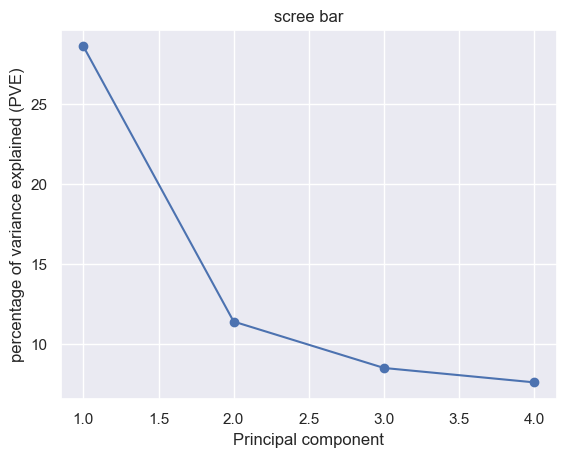

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df_golub_v = pca.fit_transform(df_normalizer)
per_var =np.round(pca.explained_variance_ratio_*100, decimals=1)
#print(per_var)
#print(np.cumsum(per_var))
labels = ["PC1", "PC2", "PC3","PC4"]
plt.plot([1,2,3,4],per_var, 'o-')
plt.ylabel("percentage of variance explained (PVE)")
plt.xlabel("Principal component")
plt.title("scree bar")

In [49]:
pca = PCA(n_components=2)
data_proj = pca.fit_transform(df_normalizer)

data_proj

array([[-3.52299983e+00,  4.65249488e-01],
       [ 8.06251966e-01, -7.04425859e-01],
       [-1.25571027e+00, -8.25799673e-01],
       [ 2.21634687e+00,  4.40165056e+00],
       [-2.27814408e+00, -1.10925941e+00],
       [-7.95234631e-01, -1.63009291e+00],
       [-1.53515225e+00, -1.40101406e+00],
       [-1.46509491e+00, -2.19992647e+00],
       [ 1.33708914e-01,  1.51714474e+00],
       [-3.09869862e+00,  4.54012673e-01],
       [-2.10986829e+00,  7.15445114e-01],
       [ 1.10417816e+00, -2.81406913e+00],
       [-3.05811942e+00, -9.74271977e-01],
       [ 1.95779220e+00, -3.07435398e+00],
       [ 7.44797249e-03, -1.84710744e+00],
       [-1.23435979e+00,  1.71916573e+00],
       [-2.13067305e-01,  6.16890162e-01],
       [-1.89622920e+00, -1.71592093e+00],
       [-2.45166171e+00, -1.03960238e+00],
       [-3.20014027e+00, -9.82691755e-01],
       [-9.33637966e-01, -1.16855977e+00],
       [-1.76801578e+00,  1.61107436e-02],
       [-1.77634397e+00, -5.55094117e-01],
       [ 1.

/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

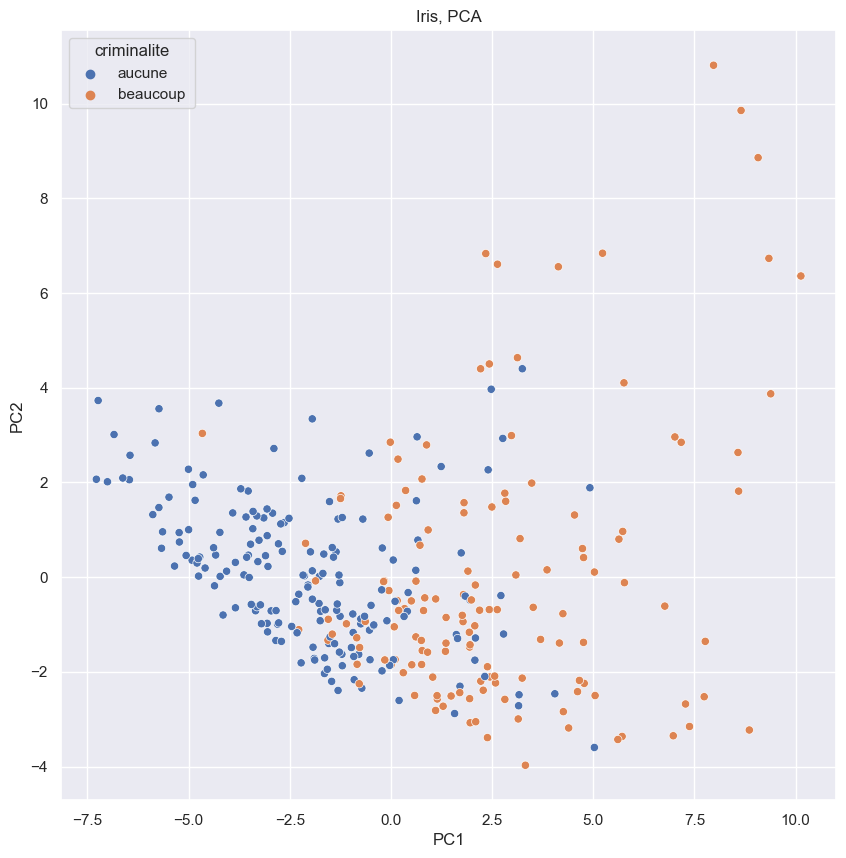

In [50]:
fig = plt.figure(figsize = (5,4))
labels = ["PC1", "PC2"]
data_proj = pd.DataFrame(data_proj,index=df5.index,columns=labels)
f, axes = plt.subplots(1, 1, figsize=(10,10))
sns.scatterplot(data_proj.PC1, data_proj.PC2 , hue = df4['criminalite']).set_title('Iris, PCA');


42


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


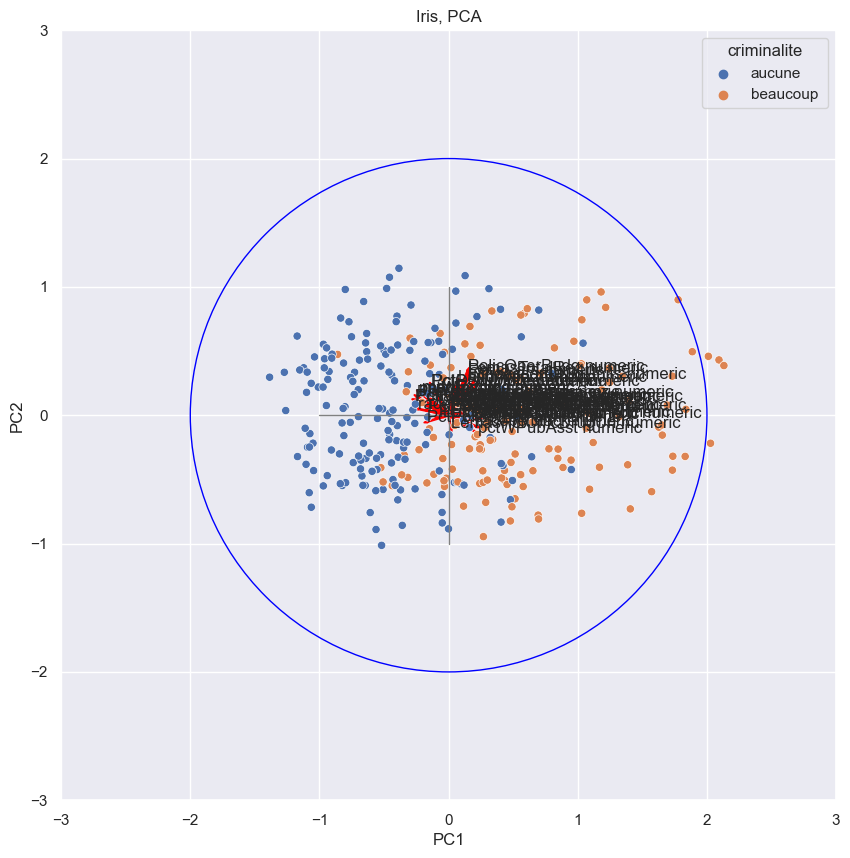

In [51]:
loadings = pca.components_.T  #nous cherchons les vecteur propres pour avoir l'axes de chaques dimension initiale dans le nouveau pal 
print(len(loadings))
pca = PCA(n_components=2)
data_golub = pca.fit_transform(df5)

attributs = df5.columns.tolist()
labels = ["PC1", "PC2"]
data_golub = pd.DataFrame(data_golub,index=df5.index,columns=labels)
fig, axis = plt.subplots(figsize=(10,10))
axis.set_xlim(-3,3)
axis.set_ylim(-3,3)
plt.plot([-1,1],[0,0],color="grey", linestyle="-",linewidth=1)
plt.plot([0,0],[-1,1],color="grey", linestyle="-",linewidth=1)
for j in range(len(loadings)):
   plt.arrow(0,0,loadings[j,0],loadings[j,1],head_width = 0.02, width=0.01,color="red")  #nous affichons l'axe de chaque dimension dans le nouveau plan 
   plt.annotate(attributs[j], (loadings[j,0],loadings[j,1]))

sns.scatterplot(data_golub.PC1, data_golub.PC2, hue = df4['criminalite']).set_title('Iris, PCA'); #nous ajoutons les valeurs dans notre noubveau plan 
cercle = plt.Circle((0,0),2,color='blue', fill = False)
axis.add_artist(cercle)  #nous ajoutons le cercle de corrélation 

In [52]:
# ANalyse MDC

/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


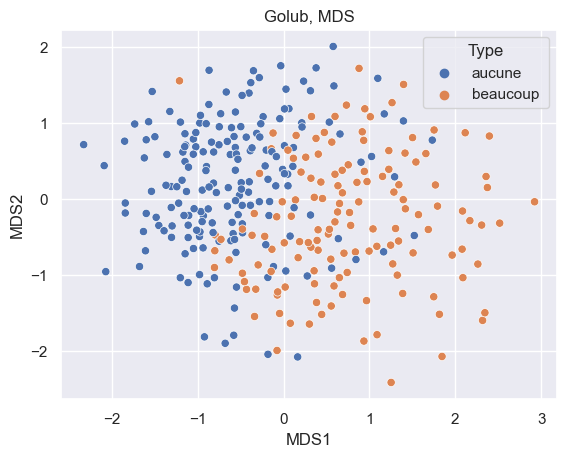

In [53]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_golub_MDS = mds.fit_transform(df5)
data_golub_MDS = pd.DataFrame(data_golub_MDS, columns=["MDS1","MDS2"])
final_mds = pd.concat([data_golub_MDS, df4['criminalite']], axis=1)
final_mds.columns = ["MDS1","MDS2", 'Type']
#types = ['AML','ALL']
#colors= ['r','b']
sns.scatterplot(final_mds.MDS1, final_mds.MDS2, hue=final_mds['Type']).set_title('Golub, MDS');

In [54]:
## LLE

/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

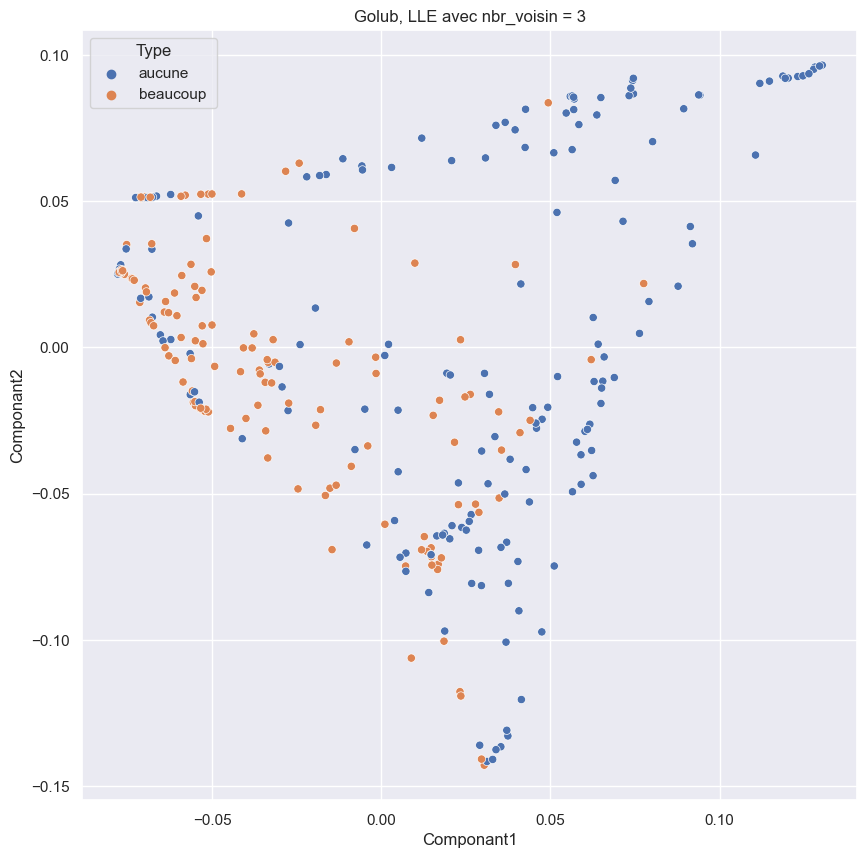

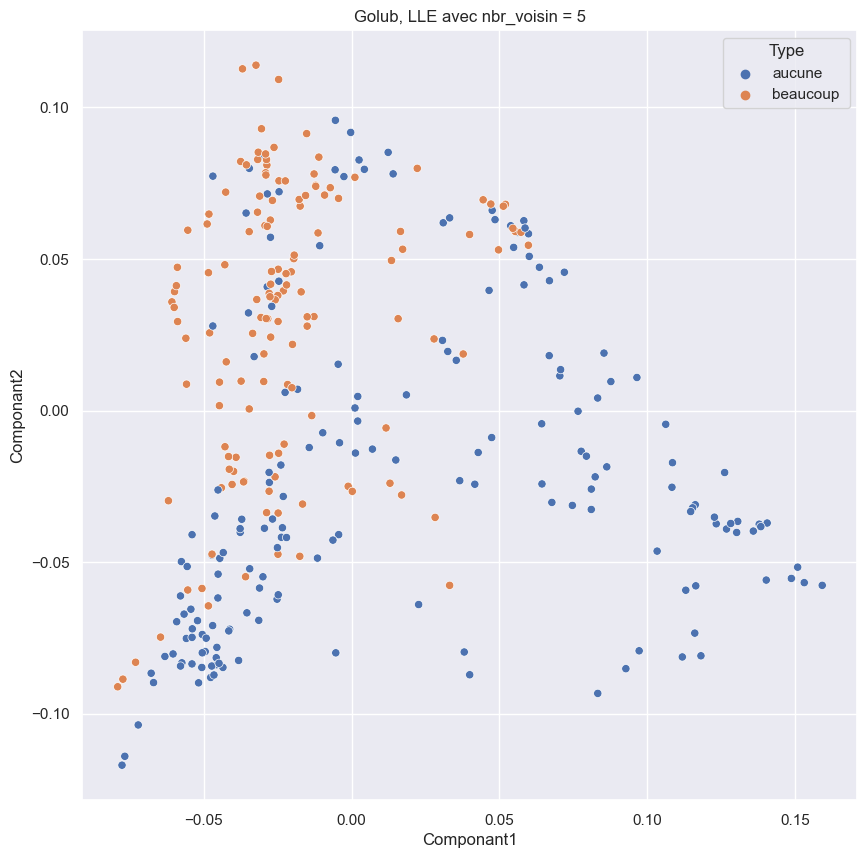

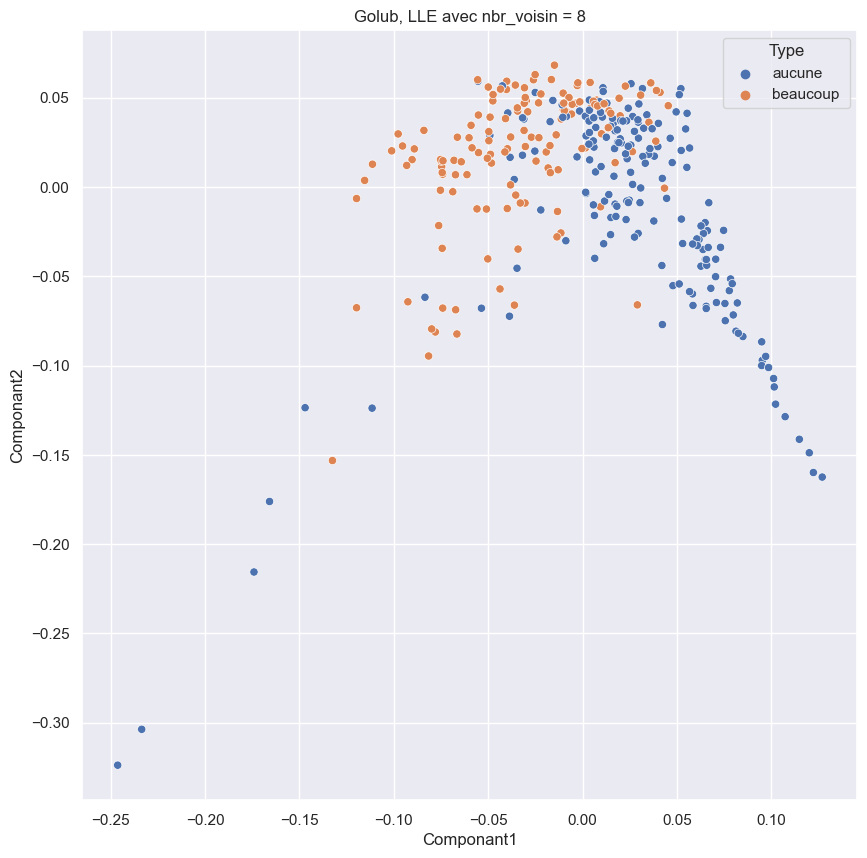

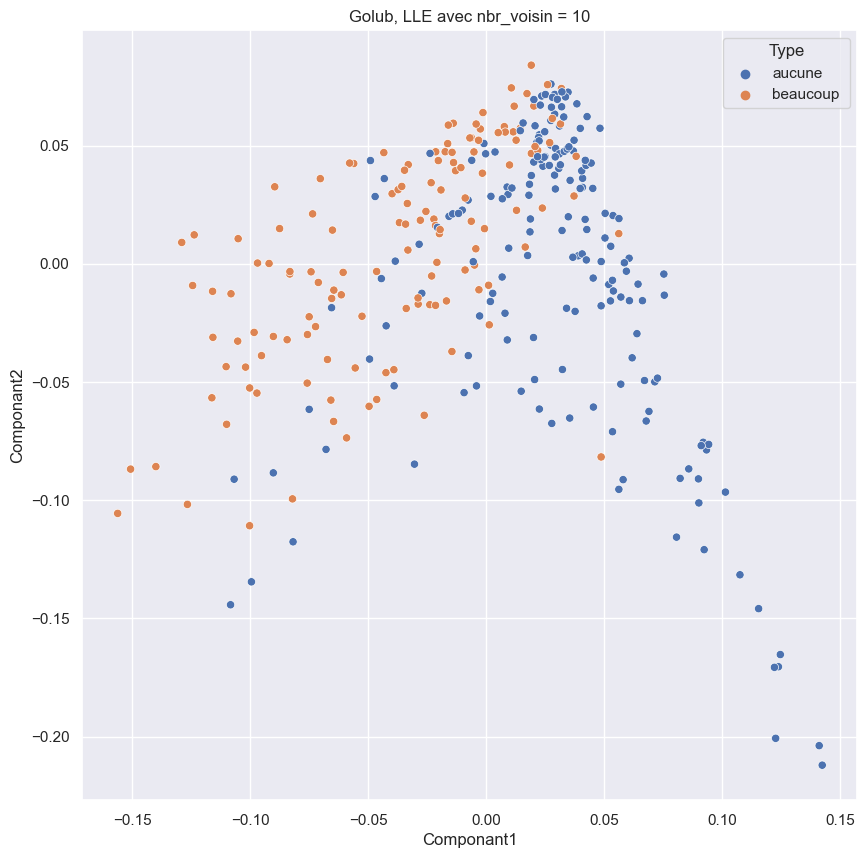

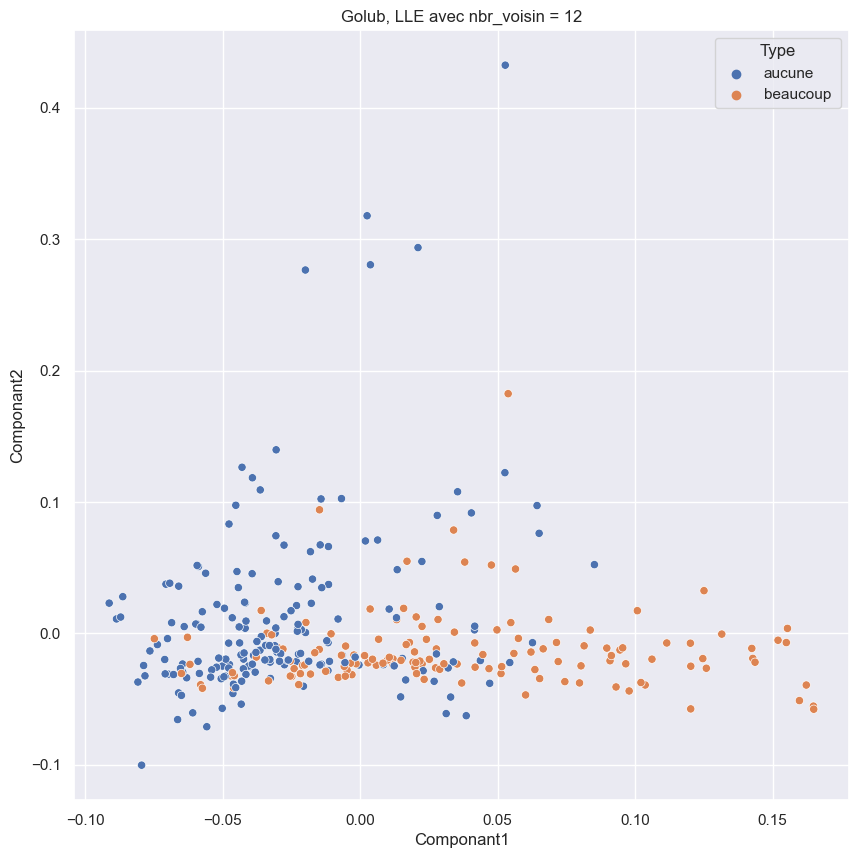

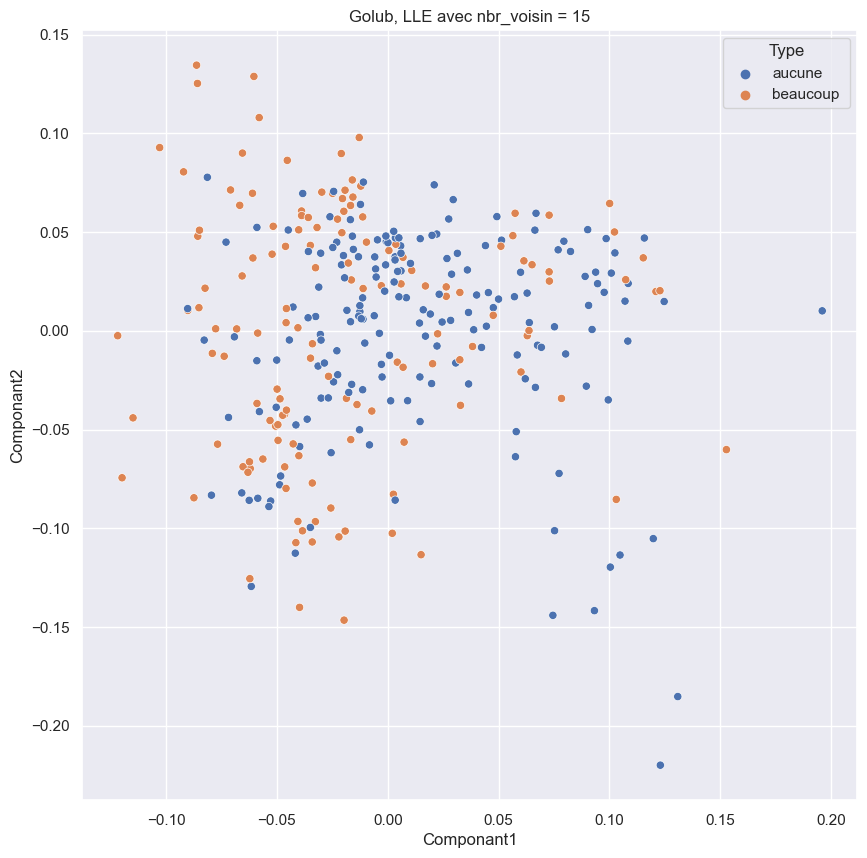

In [55]:
from sklearn.manifold import LocallyLinearEmbedding
nbr_voisin = [3, 5, 8, 10, 12 , 15]
for i in nbr_voisin : 
    embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=i)
    n_neighbor = i 
    X_transformed = embedding.fit_transform(df5)
    LLE = pd.DataFrame(X_transformed, columns=['Componant1', 'Componant2'])
    final_LLE = pd.concat([LLE, df4['criminalite']], axis=1)
    final_LLE.columns = ['Componant1', 'Componant2', 'Type']
    #colors= ['r','b']
    fig, axis = plt.subplots(figsize=(10,10))
    sns.scatterplot(final_LLE.Componant1, final_LLE.Componant2, hue=final_LLE['Type']).set_title("Golub, LLE avec nbr_voisin = {0}".format(n_neighbor));
    



5


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' 

10


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


30


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


50


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


100


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


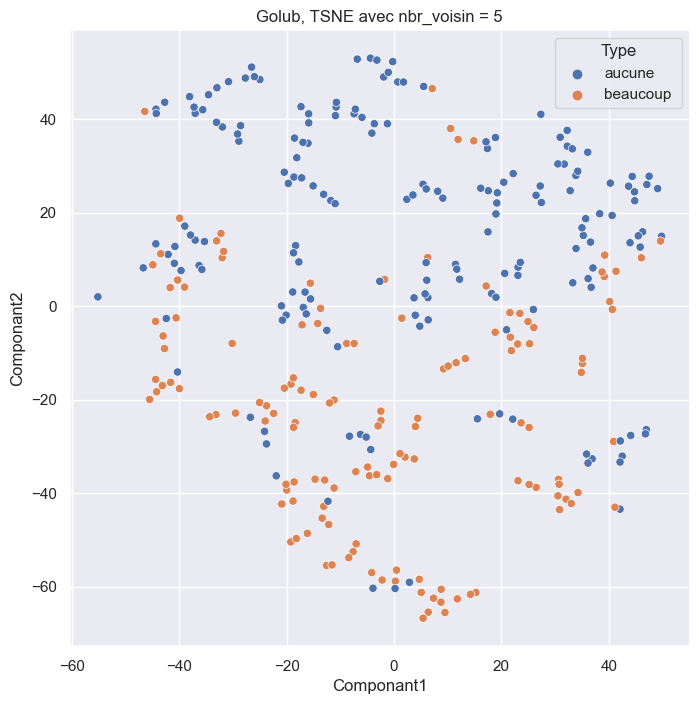

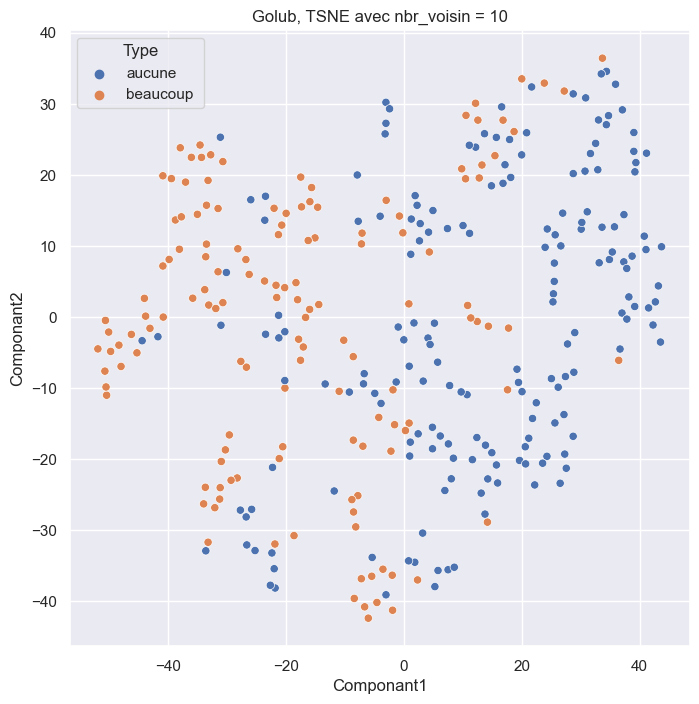

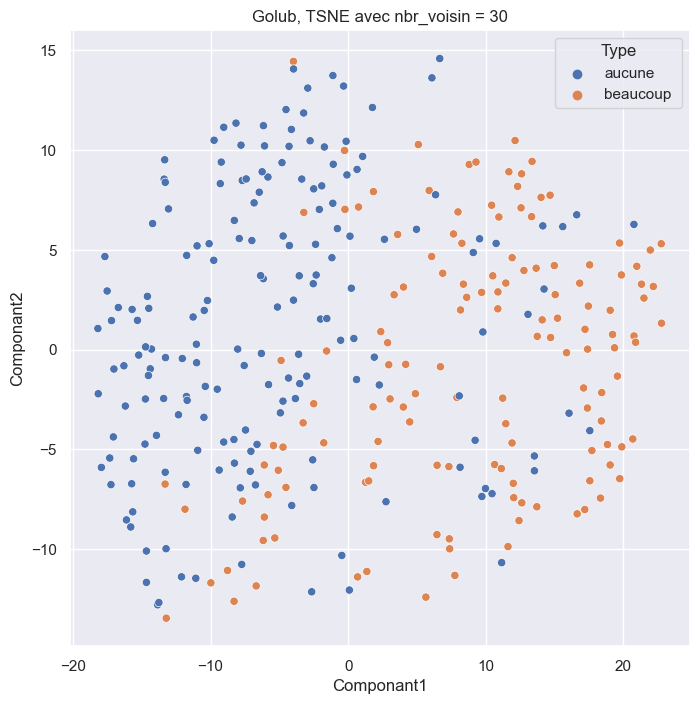

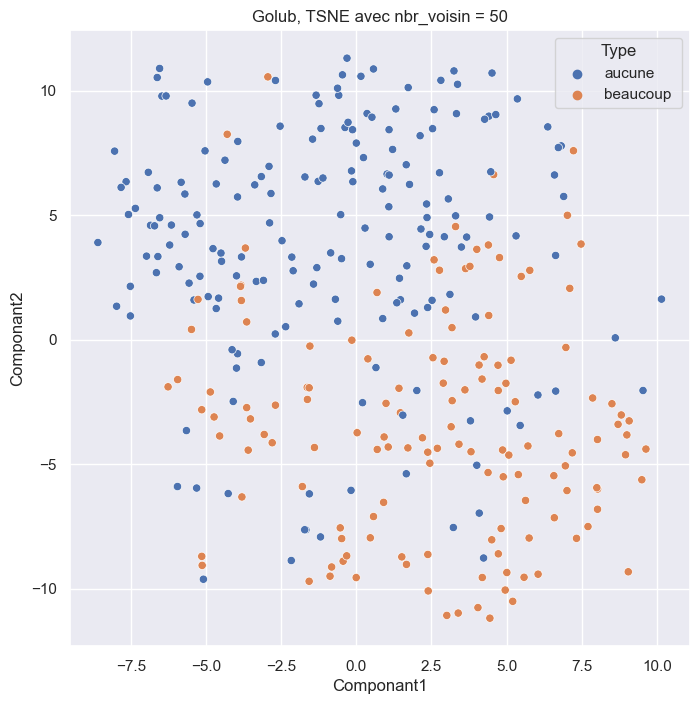

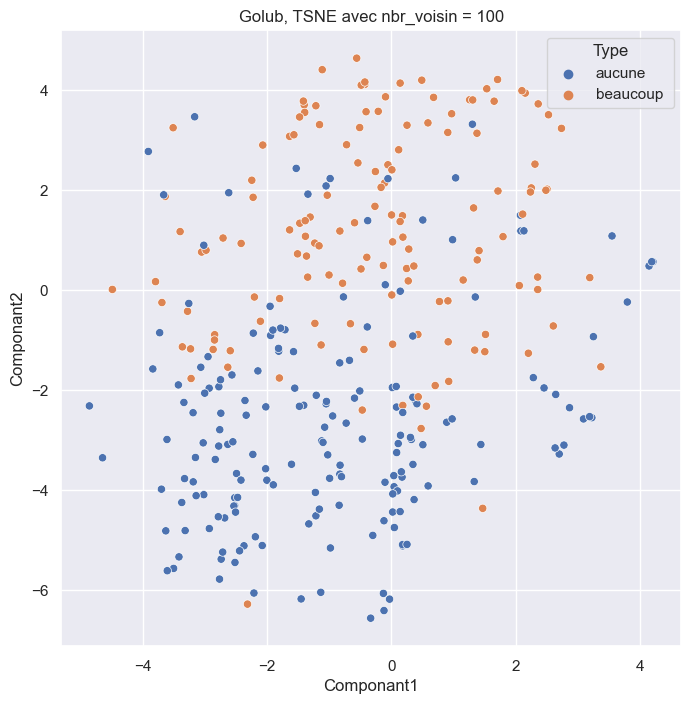

In [56]:
from sklearn.manifold import TSNE
perplexitys = [5,10, 30,50, 100]
for i in perplexitys : 
    print(i)
    embedding = TSNE(n_components=2,perplexity=i)
    perplexity = i 
    X_transformed = embedding.fit_transform(df5)
    Tsne = pd.DataFrame(X_transformed, columns=['Componant1', 'Componant2'])
    final_tsne = pd.concat([Tsne,df4['criminalite'] ], axis=1)
    final_tsne.columns = ['Componant1', 'Componant2', 'Type']
    #colors= ['r','b']
    fig, axis = plt.subplots(figsize=(8,8))
    sns.scatterplot(final_tsne.Componant1, final_tsne.Componant2, hue=final_tsne['Type']).set_title("Golub, TSNE avec nbr_voisin = {0}".format(perplexity));
    



In [57]:
# Modele Predictif 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
df_ia2 = df_ia.corr()["ViolentCrimesPerPop numeric"]
df_ia2 = pd.DataFrame(df_ia2)
#df_ia2.columns = ["test", "cor"]
df_ia2['index'] = df_ia2.index
for i,j in zip(df_ia2["ViolentCrimesPerPop numeric"],df_ia2["index"]):
    if 0.6 >i >-0.6:
        df_ia2 = df_ia2.drop(j)
        
df_test = pd.DataFrame()
for i in df_ia2["index"]:
    df_test= pd.concat([df_test, df_ia[i]], axis=1)
df_test

,racepctblack numeric,racePctWhite numeric,pctWInvInc numeric,PctPopUnderPov numeric,PctFam2Par numeric,PctKids2Par numeric,PctYoungKids2Par numeric,PctTeen2Par numeric,PctIlleg numeric,ViolentCrimesPerPop numeric
0,0.02,0.90,0.60,0.19,0.55,0.59,0.61,0.56,0.14,0.20
1,0.40,0.63,0.51,0.48,0.20,0.25,0.25,0.19,0.73,0.49
2,0.05,0.71,0.37,0.34,0.60,0.61,0.64,0.61,0.22,0.34
3,0.47,0.59,0.36,0.33,0.53,0.51,0.59,0.51,0.35,0.69
4,0.04,0.89,0.49,0.36,0.59,0.61,0.51,0.66,0.26,0.63
...,...,...,...,...,...,...,...,...,...,...
314,0.21,0.29,0.55,0.33,0.49,0.46,0.62,0.52,0.40,0.75
315,0.17,0.84,0.71,0.10,0.78,0.79,0.88,0.76,0.11,0.07
316,0.25,0.69,0.45,0.31,0.42,0.42,0.47,0.47,0.54,0.23
317,0.06,0.87,0.55,0.16,0.64,0.65,0.75,0.71,0.17,0.19


In [60]:
df4 = df_ia["ViolentCrimesPerPop numeric"]
df4= df4.reset_index()
df4.columns = ["ville","ViolentCrimesPerPop numeric"]
df4["ville"] = df4["ville"]+1
df4 = pd.DataFrame(df4)
classif =[]
for i in df4["ViolentCrimesPerPop numeric"]:
    if i <= 0.444 : 
        classif.append("aucune")
    elif 1 >= i >0.444 :
        classif.append("beaucoup ")
        
        
df4 = pd.concat([df4,pd.DataFrame(classif)], axis=1)
df4.columns = ["ville","ViolentCrimesPerPop numeric","criminalite"]

df4

,ville,ViolentCrimesPerPop numeric,criminalite
0,1,0.20,aucune
1,2,0.49,beaucoup
2,3,0.34,aucune
3,4,0.69,beaucoup
4,5,0.63,beaucoup
...,...,...,...
314,315,0.75,beaucoup
315,316,0.07,aucune
316,317,0.23,aucune
317,318,0.19,aucune


In [61]:
X= df_test # afficher tout sauf la derniere colonne
Y = df4["criminalite"]
X

,racepctblack numeric,racePctWhite numeric,pctWInvInc numeric,PctPopUnderPov numeric,PctFam2Par numeric,PctKids2Par numeric,PctYoungKids2Par numeric,PctTeen2Par numeric,PctIlleg numeric,ViolentCrimesPerPop numeric
0,0.02,0.90,0.60,0.19,0.55,0.59,0.61,0.56,0.14,0.20
1,0.40,0.63,0.51,0.48,0.20,0.25,0.25,0.19,0.73,0.49
2,0.05,0.71,0.37,0.34,0.60,0.61,0.64,0.61,0.22,0.34
3,0.47,0.59,0.36,0.33,0.53,0.51,0.59,0.51,0.35,0.69
4,0.04,0.89,0.49,0.36,0.59,0.61,0.51,0.66,0.26,0.63
...,...,...,...,...,...,...,...,...,...,...
314,0.21,0.29,0.55,0.33,0.49,0.46,0.62,0.52,0.40,0.75
315,0.17,0.84,0.71,0.10,0.78,0.79,0.88,0.76,0.11,0.07
316,0.25,0.69,0.45,0.31,0.42,0.42,0.47,0.47,0.54,0.23
317,0.06,0.87,0.55,0.16,0.64,0.65,0.75,0.71,0.17,0.19


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

#On normalise les données, afin que certaines variables ne pèsent pas plus que d'autres.
#En effet, symétrie diagonale peut être élevé alors que symétrie verticale est 0 ou un 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [64]:

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, Y_train)


#Résultat prédiction
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(round(cm.trace()/cm.sum(),3))
print(classification_report(Y_test, Y_pred))


[[57  3]
 [ 1 35]]
0.958
              precision    recall  f1-score   support

      aucune       0.98      0.95      0.97        60
   beaucoup        0.92      0.97      0.95        36

    accuracy                           0.96        96
   macro avg       0.95      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/godefroyduchalardhotmail.fr/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken w

Text(0, 0.5, 'Mean Error')

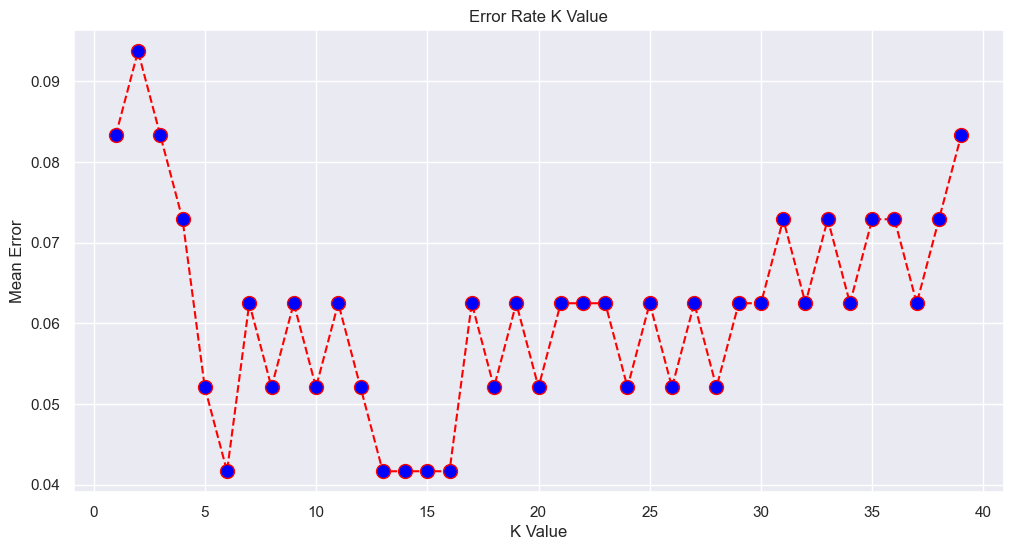

In [65]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))



plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [66]:
from sklearn import tree

X= df_test # afficher tout sauf la derniere colonne
Y = df4["criminalite"]

#1/3 je de test, et 1/3 jeu d'entrainement
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y,test_size=0.30, random_state=42)

#On normalise les données, afin que certaines variables ne pèsent pas plus que d'autres.
#En effet, symétrie diagonale peut être élevé alors que symétrie verticale est 0 ou un 

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train2,Y_train2 )
prediction = clf.predict(X_test2)
print(prediction)


#ree.plot_tree(clf)
#Résultat prédiction
cm2 = confusion_matrix(Y_test2, prediction)
print(classification_report(Y_test2, prediction))
print(round(cm2.trace()/cm2.sum(),3))
#Y_pred2


['beaucoup ' 'aucune' 'beaucoup ' 'aucune' 'aucune' 'aucune' 'beaucoup '
 'aucune' 'aucune' 'aucune' 'aucune' 'aucune' 'beaucoup ' 'beaucoup '
 'beaucoup ' 'aucune' 'aucune' 'aucune' 'beaucoup ' 'aucune' 'beaucoup '
 'aucune' 'aucune' 'beaucoup ' 'aucune' 'beaucoup ' 'aucune' 'aucune'
 'aucune' 'aucune' 'aucune' 'aucune' 'aucune' 'beaucoup ' 'aucune'
 'beaucoup ' 'aucune' 'beaucoup ' 'beaucoup ' 'beaucoup ' 'aucune'
 'beaucoup ' 'beaucoup ' 'aucune' 'aucune' 'beaucoup ' 'aucune' 'aucune'
 'beaucoup ' 'aucune' 'beaucoup ' 'aucune' 'aucune' 'aucune' 'aucune'
 'aucune' 'aucune' 'beaucoup ' 'aucune' 'aucune' 'aucune' 'aucune'
 'aucune' 'beaucoup ' 'beaucoup ' 'beaucoup ' 'aucune' 'beaucoup '
 'beaucoup ' 'aucune' 'aucune' 'beaucoup ' 'beaucoup ' 'beaucoup '
 'aucune' 'beaucoup ' 'beaucoup ' 'beaucoup ' 'beaucoup ' 'aucune'
 'beaucoup ' 'aucune' 'aucune' 'aucune' 'aucune' 'beaucoup ' 'aucune'
 'aucune' 'aucune' 'aucune' 'aucune' 'aucune' 'aucune' 'aucune' 'aucune'
 'beaucoup ']
            